
## Tarea #5.6
## FIS1344 - Métodos númericos y probabilidades
## Marcos Ausgusto Elgueta Salas

Un cierto sensor se deja abierto por un segundo. El sensor consiste en $r$ pixeles y en promedio el sensor es golpeado por $2$ partículas por segundo, tal que la probabilidad de detectar una partícula en un pixel dado es de $2/r$ (para $r \gg 2$). Grafique la distribución de probabilidad de observar $n$ partículas para un pixel dado, en función de $n$, para diferentes valores de $r$:

* Usando la distribución binomial.

* ¿Cuándo es posible usar la distribución de Poisson?

Entonces tengo un sensor de r pixeles.\
En promedio el sensor es golpeado por 2 partículas por segundo.\
La probabilidad de detectar una partícula en un pixel es de $\frac{2}{r}, (para, r >>2)$\
-Gráfique la distribución de probabilidad de observar n partículas para un pixel dado, en funcón de n, para diferentes
valores de r.

La distribución binomial ¿Cúal es la probabilidad de observar n particulas para un pixel dado en función de n, para diferentes r?

p: La probabilidad de detectar una partícula en un pixel ($\frac{2}{r}, para, r >>2)$\
n: Número de Partículas\
r: Pixeles\
t: tiempo de 1(s)\

Puedo usar el mismo código que vimos en clases para representar un experimento a la fuerza bruta:
Ahora mi probabilidad será p= (2/r_pixeles)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def prob(evento, dist):
    '''
    Calcula la probabilidad de un evento a partir de una distribución. El evento debe ser una función que
    regresa verdadero o falso y la distribución debe ser un diccionario (evento: frecuencia)
    '''
    
    conjunto = {e for e in dist.keys() if evento(e)}
    total = sum(d for d in dist.values())
    frec = sum(dist[e] for e in conjunto)
    return frec/total

In [3]:
def realizar_experimento(muestra, dist):
    '''
    Definimos una función que simula realizar un experimento.
    Toma una muestra que es una lista con todos los posibles resultados de tener n-1 particulas
    y regresa una lista con todos los posibles resultados al tener n particulas.
    muestra y dist son la distribución de n-1 particulas y la distribución de un experimento.
    '''
    nueva = {}
    if len(muestra) == 0:
        return {e:p for e, p in dist.items()}
    for e, prob_e in muestra.items():
        for res, prob_r in dist.items():
            nuevo_evento = e + res
            nueva_prob = prob_e*prob_r
            nueva[nuevo_evento] = nueva_prob
    return nueva

def r_experimentos(r_pixeles, p):
    '''
    Simula tener r pixeles, toma el número de pixeles y La probabilidad de detectar una partícula en un pixel.
    '''
    p = (2/r_pixeles)
    dist_un_experimento = {'+': p, '-': (1-p)}
    muestra = {}
    for i in range(r_pixeles):
        muestra = realizar_experimento(muestra, dist_un_experimento)
    return muestra

def n_exitos(n_particulas, e):
    return e.count('+') == n_particulas

In [4]:
def binomial_fuerza_bruta(n_particulas, r_pixeles, p):
    '''
    Calcula la distribución polinomial a fuerza bruta: Simula la realización de un experimento
    con r pixeles
    y cuenta los casos en los que hay n partículas por segundo.
    '''
    dist = r_experimentos(r_pixeles, p)
    def evento(e):
        return n_exitos(n_particulas, e)
    return prob(evento, dist)

In [14]:
binomial_fuerza_bruta(5,20,0.1)

0.03192136111998754

In [58]:
from scipy.special import comb
def binomial(n_particulas, r_pixeles, p):
    p = 2/r_pixeles
    return comb(r_pixeles, n_particulas)*p**n_particulas*(1-p)**(r_pixeles - n_particulas)

In [59]:
binomial(5,20,1)

0.0319213611199544

In [60]:
def probs(n_particulas, r_pixeles, p):
    p = 2/r_pixeles
    return [binomial(n_particulas, r_pixeles, p) for n_particulas in range(r_pixeles+1)]

<ipython-input-68-08284b27a741>:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


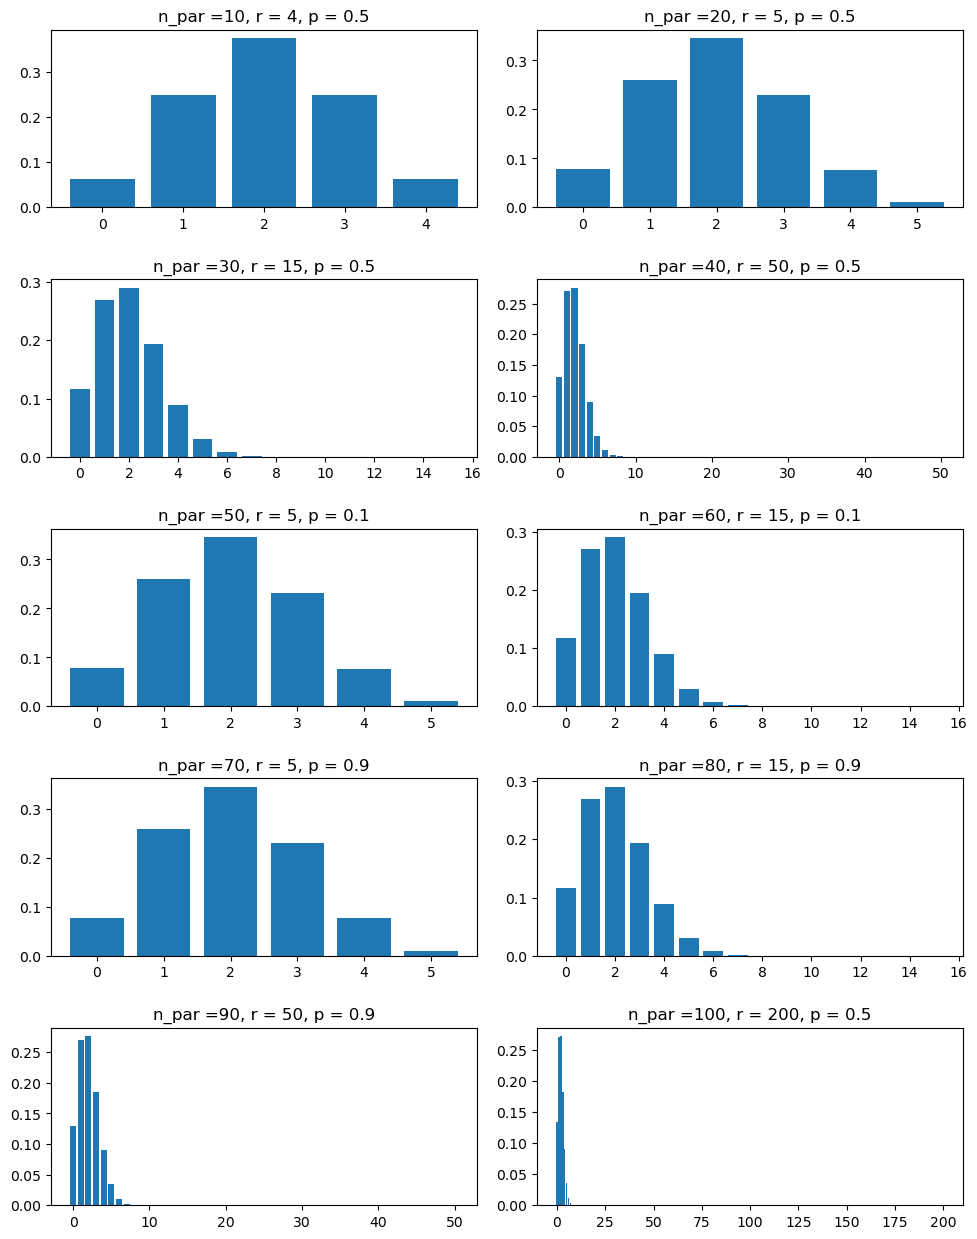

In [68]:
fig = plt.figure(figsize=(10,20), dpi= 100)

ax1 = fig.add_subplot(8,2,1)
ax2 = fig.add_subplot(8,2,2)
ax3 = fig.add_subplot(8,2,3)
ax4 = fig.add_subplot(8,2,4)
ax5 = fig.add_subplot(8,2,5)
ax6 = fig.add_subplot(8,2,6)
ax7 = fig.add_subplot(8,2,7)
ax8 = fig.add_subplot(8,2,8)
ax9 = fig.add_subplot(8,2,9)
ax10 = fig.add_subplot(8,2,10)

ax1.bar(range(4+1), probs(10, 4,0.5))
ax2.bar(range(5+1), probs(20, 5,0.5))
ax3.bar(range(15+1), probs(30, 15,0.5))
ax4.bar(range(50+1), probs(40, 50,0.5))
ax5.bar(range(5+1), probs(50, 5,0.1))
ax6.bar(range(15+1), probs(60, 15,0.1))
ax7.bar(range(5+1), probs(70, 5,0.9))
ax8.bar(range(15+1), probs(80, 15,0.9))
ax9.bar(range(50+1), probs(90, 50,0.9))
ax10.bar(range(200+1), probs(100, 200,0.5)) 

ax1.set_title('n_par =10, r = 4, p = 0.5')
ax2.set_title('n_par =20, r = 5, p = 0.5')
ax3.set_title('n_par =30, r = 15, p = 0.5')
ax4.set_title('n_par =40, r = 50, p = 0.5')
ax5.set_title('n_par =50, r = 5, p = 0.1')
ax6.set_title('n_par =60, r = 15, p = 0.1')
ax7.set_title('n_par =70, r = 5, p = 0.9')
ax8.set_title('n_par =80, r = 15, p = 0.9')
ax9.set_title('n_par =90, r = 50, p = 0.9')
ax10.set_title('n_par =100, r = 200, p = 0.5')

fig.tight_layout(pad=2.0)


fig.show()

### La distribución de poisson:

No se puede usar en este caso porque se usa para n eventos de un proceso que en promedio ocurre  $lambda$ veces en un intervalo.
Va del discreto a lo continuo.